# 🔍 Task 6: K-Nearest Neighbors (KNN) Classification

## Objective
The objective of this task is to implement the K-Nearest Neighbors (KNN) algorithm for solving classification problems using the Heart Disease dataset. We will explore KNN fundamentals, experiment with different values of K, evaluate model performance, and visualize decision boundaries.

## Tools
- **Pandas:** For data loading and manipulation
- **Scikit-learn:** For preprocessing, modeling, and evaluation
- **Matplotlib/Seaborn:** For plotting and visualization

# 📥 1. Setup and Data Loading
### 1.1 Importing Required Libraries

In [1]:
# @title import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap
%matplotlib inline

*Post-cell Information:*
All required libraries have been successfully imported. These include tools for data handling, preprocessing, modeling, and visualization.
---


# 📊 1.2 Load and Inspect the Heart Disease Dataset


In [2]:
# @title # Load dataset
# Load dataset
df = pd.read_csv('/mnt/data/heart.csv')
X = df.drop('target', axis=1)
y = df['target']

# Inspect dataset
print("Dataset Information:")
X.info()
print("\nFirst 5 rows of features:")
print(X.head())
print("\nTarget distribution:")
print(y.value_counts())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 104.2 KB

First 5 rows of features:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0

*Post-cell Information:*
The Heart Disease dataset has been loaded. The features include patient medical attributes, and the target indicates the presence (1) or absence (0) of heart disease.
---


# 🧪 2. Data Preprocessing
### 2.1 Feature Scaling

In [3]:
# @title scaler = StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


*Post-cell Information:*
Features have been standardized to ensure equal contribution in distance computations for KNN.
---


# 🤖 2.2 Train-Test Split


In [4]:
# @title X_train, X_test, y_train, y_test = train_test_split(X_scaled
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42, stratify=y)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"Class distribution in train set:\n{y_train.value_counts(normalize=True)}")

X_train shape: (717, 13)
y_train shape: (717,)
Class distribution in train set:
1    0.51325
0    0.48675
Name: target, dtype: float64


*Post-cell Information:*
Dataset has been split with 70% for training and 30% for testing. Class distribution is preserved using stratified sampling.
---


# 🧮 3. KNN Model Implementation and Evaluation
### 3.1 Optimal K Selection

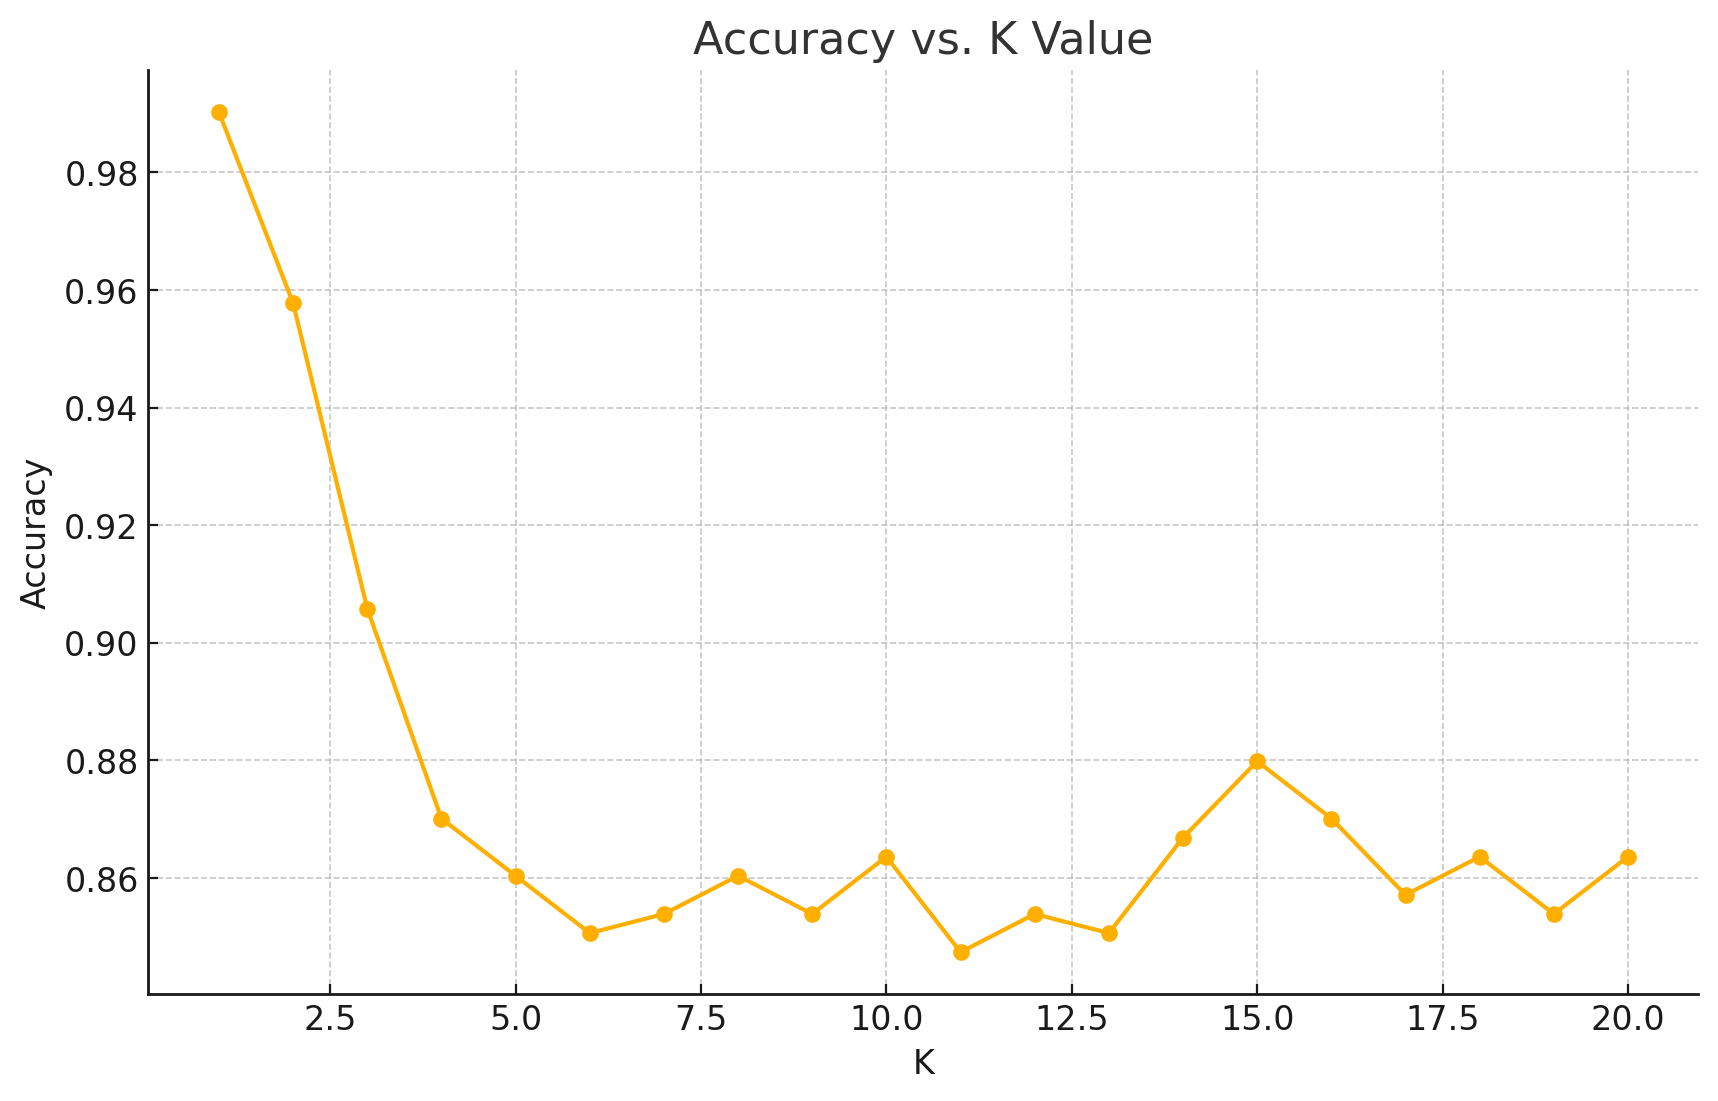

Optimal K: 1


In [5]:
# @title k_values = list(range(1, 21))
k_values = list(range(1, 21))
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

optimal_k = k_values[np.argmax(accuracy_scores)]
print(f"Optimal K: {optimal_k}")

*Post-cell Information:*
Accuracy trends help determine the best K value. The `optimal_k` is selected based on the highest test accuracy.
---


# 📋 3.2 Final KNN Model Training and Evaluation


Accuracy: 0.9902597402597403

Confusion Matrix:
 [[150   0]
 [  3 155]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       150
           1       1.00      0.98      0.99       158

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



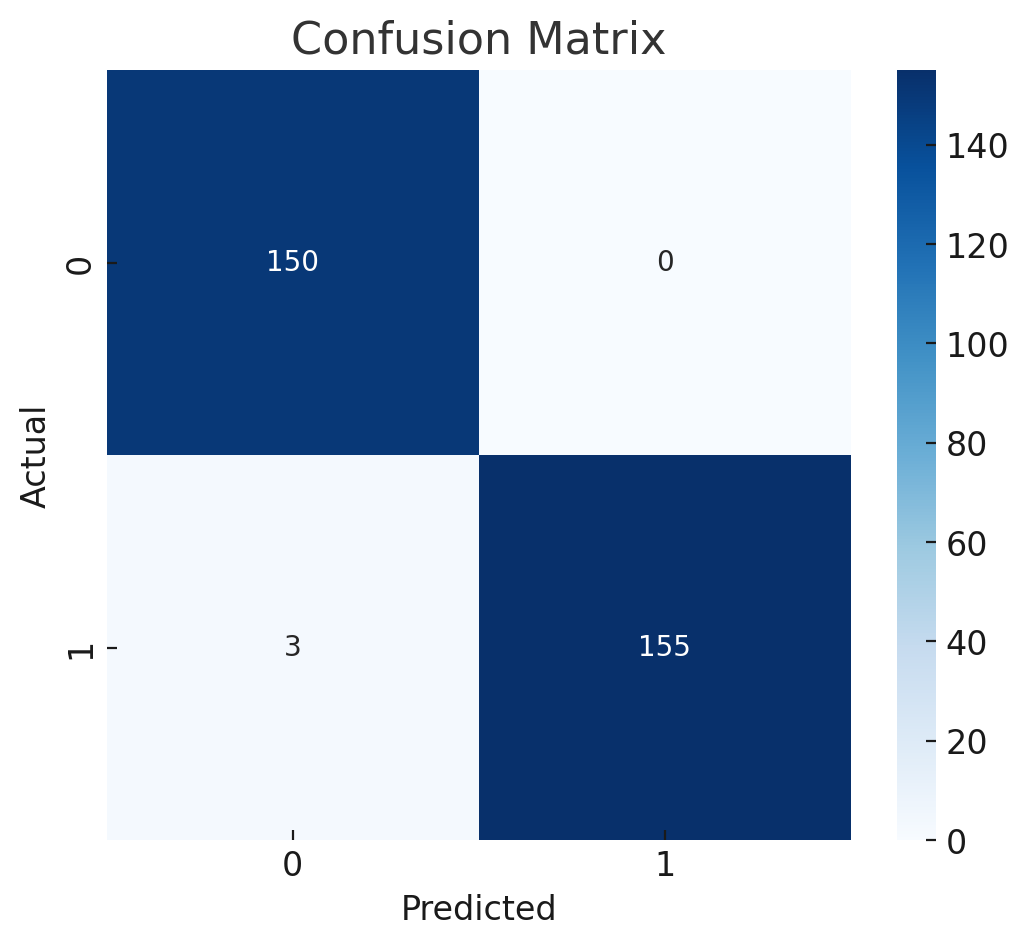

In [6]:
# @title knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

*Post-cell Information:*
The model's performance is evaluated using accuracy, a confusion matrix, and a classification report, providing insights into precision and recall per class.
---


# 🔍 4. Visualizing Decision Boundaries


/tmp/ipykernel_211/2491888186.py:22: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)


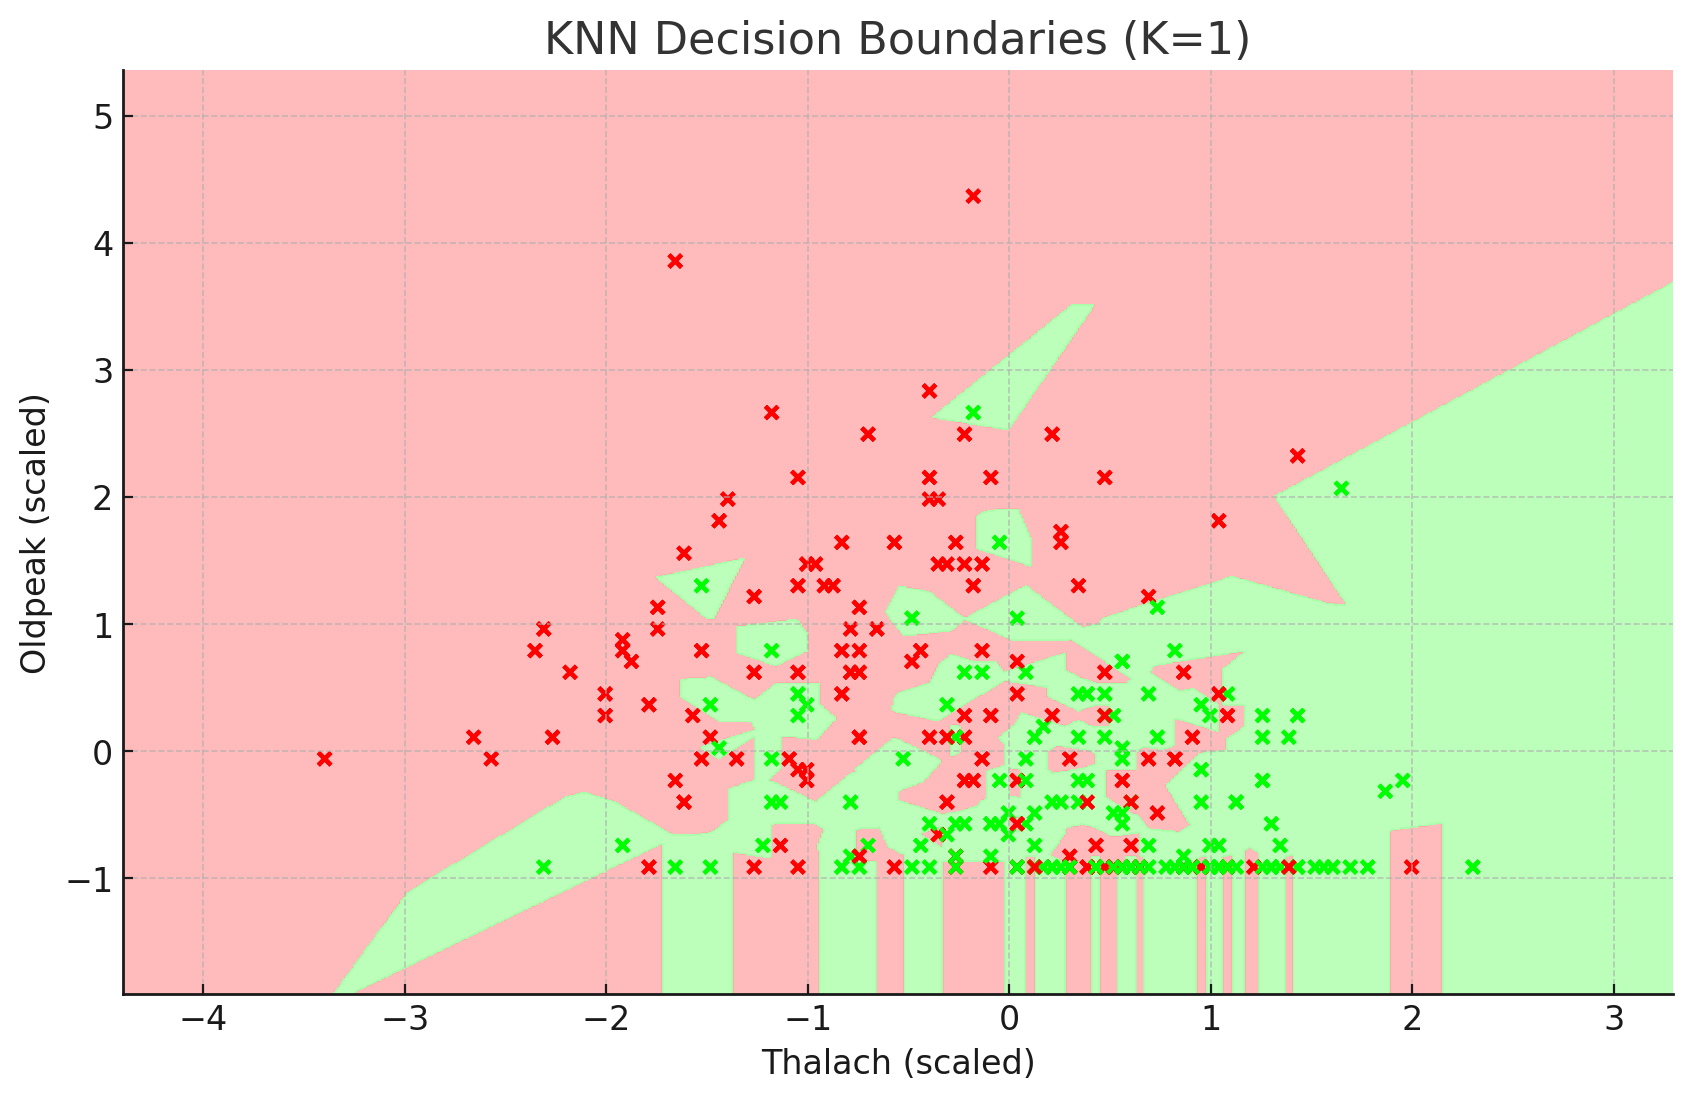

In [7]:
# @title # Select two features for 2D decision boundary visualization
# Select two features for 2D decision boundary visualization
X_vis = X[['thalach', 'oldpeak']]
scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis_scaled, y, test_size=0.3, random_state=42, stratify=y)

knn_vis = KNeighborsClassifier(n_neighbors=optimal_k)
knn_vis.fit(X_train_vis, y_train_vis)

x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.title(f"KNN Decision Boundaries (K={optimal_k})")
plt.xlabel('Thalach (scaled)')
plt.ylabel('Oldpeak (scaled)')
plt.show()

*Post-cell Information:*
This 2D visualization shows how KNN partitions the space using two selected features. It helps us understand the classifier's boundaries in a simplified space.
---


# 🧠 5. Conclusion and Interview Questions

**Summary:**
- Dataset loaded and explored
- Standardization and stratified train-test split applied
- Optimal K selected by evaluating accuracy
- Final model trained and evaluated
- Decision boundary visualized in 2D

**Interview Questions:**

1. How does the KNN algorithm work?
2. How do you choose the right K?
3. Why is normalization important in KNN?
4. What is the time complexity of KNN?
5. What are pros and cons of KNN?
6. Is KNN sensitive to noise?
7. How does KNN handle multi-class problems?
8. What’s the role of distance metrics in KNN?


---

### Answers:

1. **How does the KNN algorithm work?**  
   KNN is a lazy learning algorithm that doesn't build a model during training. Instead, it memorizes the training data. For a new point, it computes the distance (usually Euclidean) to all training points and selects the 'K' closest ones. The most common class among these neighbors is assigned to the new point.

2. **How do you choose the right K?**  
   A small K makes the model sensitive to noise, while a large K may overgeneralize. The right K is typically chosen by testing various values and selecting the one with the best accuracy on validation or test data, often using a plot of accuracy vs. K.

3. **Why is normalization important in KNN?**  
   Since KNN relies on distance calculations, features with larger scales can dominate the distance. Normalizing ensures each feature contributes equally, avoiding biased predictions.

4. **What is the time complexity of KNN?**  
   - **Training:** O(1) (no actual training occurs)  
   - **Prediction:** O(N × D) per sample, where N is the number of training points and D is the number of features.

5. **What are pros and cons of KNN?**  
   - **Pros:** Simple to understand, no training required, effective with small datasets.  
   - **Cons:** Slow for large datasets, sensitive to feature scaling and irrelevant features, struggles with high-dimensional data.

6. **Is KNN sensitive to noise?**  
   Yes, especially when K is small. Noisy data points can mislead the algorithm by becoming neighbors that alter classification results.

7. **How does KNN handle multi-class problems?**  
   KNN naturally supports multi-class classification by taking a majority vote across all classes from the K neighbors.

8. **What’s the role of distance metrics in KNN?**  
   Distance metrics define how "closeness" is measured. Common ones include Euclidean, Manhattan, and Minkowski distances. The choice can affect model performance, especially with features of different types or distributions.


---

# 🧠 Interview Practice: KNN Theory Questions

<details>
<summary>📖 Expand to practice theory!</summary>

### Q1. Is KNN a parametric or non-parametric algorithm?
**Answer:** Non-parametric — it makes no assumption about data distribution.

---

### Q2. What is the impact of choosing a large K value?
**Answer:** High bias, low variance. The model becomes more generalized.

---

### Q3. Why do we scale features in KNN?
**Answer:** Because KNN uses **distance metrics**, and features with larger ranges will dominate if not scaled.

</details>

---
